In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [36]:
data1 = pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [40]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [42]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


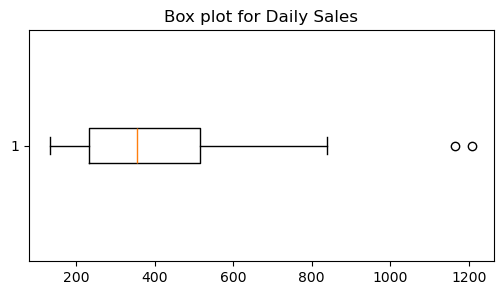

In [44]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"],vert = False)
plt.show()

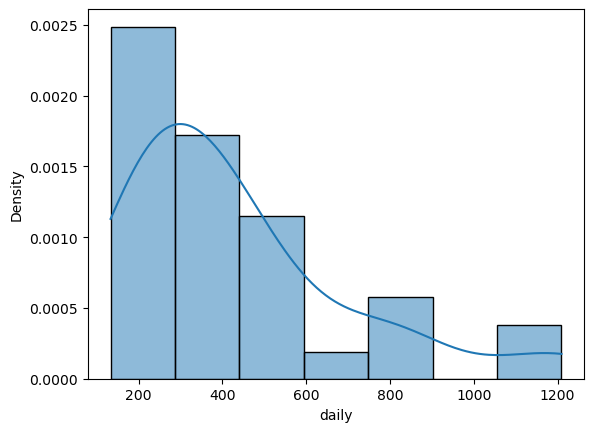

In [46]:
sns.histplot(data1["daily"], kde = True,stat= 'density',)
plt.show()

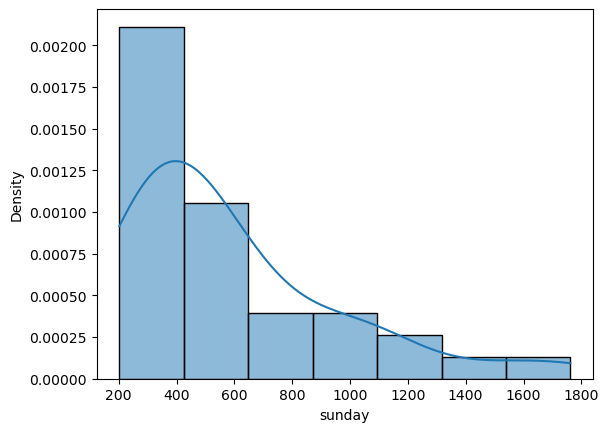

In [48]:
sns.histplot(data1["sunday"], kde = True,stat= 'density',)
plt.show()

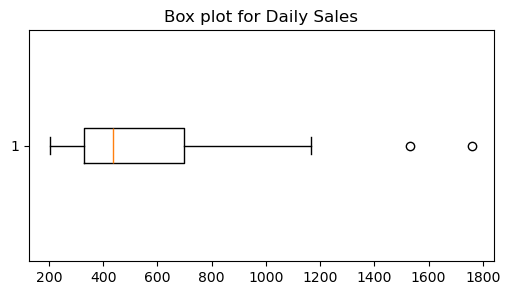

In [50]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["sunday"],vert = False)
plt.show()

- There are no missing values
- The daily column values appers to be right-skewed
- the sunday column values also apper to be right-skewed
- There are two outliers in both daily column also in sunday column as observed from the boxplot

Scatter plot and correlation Strength

Observations

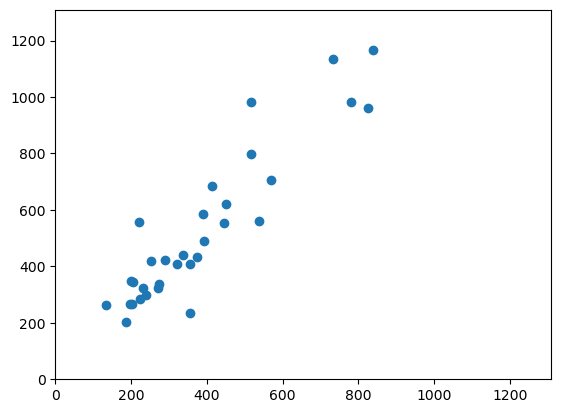

In [55]:
x= data1["daily"]
y= data1["sunday"]
plt.scatter(data1["daily"], data1["sunday"])
plt.xlim(0, max(x) + 100)
plt.ylim(0, max(x) + 100)
plt.show()            

In [57]:
data1["daily"].corr(data1["sunday"])


0.9581543140785462

In [59]:
data1[['daily','sunday']].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Observations

- The relationship between x (daily) and y(sunday) is seen to be linear as seen from sscatter plot
- The correlation is strong positive with pearson;s correlation coefficient of 0.98154

In [63]:
import statsmodels.formula.api as smf
model1 = smf.ols('sunday~daily',data = data1).fit()

In [65]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:32:58   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data1).fit()


In [69]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:32:59   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

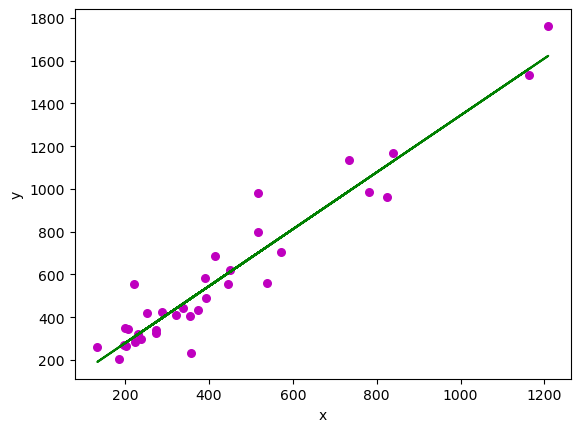

In [71]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x,y, color = 'm' , marker = 'o' , s = 30)
b0 = 13.84
b1 = 1.33
y_hat = b0 + b1*x
plt.plot(x,y_hat, color = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

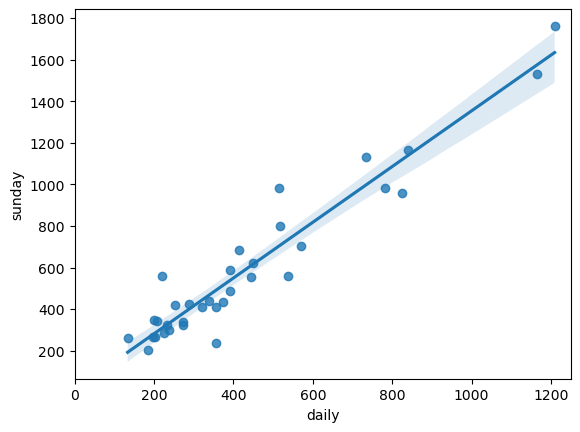

In [73]:
sns.regplot(x='daily' , y='sunday', data=data1)
plt.xlim([0,1250])
plt.show()

Predict for new data points(test data)

In [81]:
newdata=pd.Series([200,300,1500])


In [85]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [89]:
pred = model1.predict(data1['daily'])
pred


0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [91]:
data1['Y_hat'] = pred
data1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [95]:
data1['residuls']=data1['sunday']-data1['Y_hat']
data1

,Newspaper,daily,sunday,Y_hat,residuls
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [97]:
import statsmodels.formula.api as smf
model1 = smf.ols('sunday~daily',data = data1).fit()

In [99]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:42:59   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
mse = np.mean((data1['daily']-data1['Y_hat'])**2)
rmse = np.sqrt(mse)
print('MSE: ',mse)
print('RMSE: ',rmse)

MSE:  33794.87469205266
RMSE:  183.83382358002746


In [103]:
mae = np.mean(np.abs(data1['daily']-data1['Y_hat']))
mae

160.23994117647064